# 1- A/B TESTING OF SUMDATA(ADVERT PERIOD AND BEFORE ADVERT PERIOD)

## Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.stats as stats
from scipy.stats import shapiro

pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_sumdata = pd.read_csv("sumdata_df_outlier_detected.csv")
df_salevali = pd.read_csv("salevali_df_outlier_detected.csv")
df_wocommerce = pd.read_csv("wocommerce_df_outlier_detected.csv")
df_whole = pd.read_excel("tum_data.xlsx")

In [3]:
df_sumdata.head()

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit
0,2,2021-09-21,Speyer,D,B2B,WABENHONIG IM HOLZRAHMEN 450G,BAL CESITLERI,WABENHONIG,1.00,11.21,kg,6.91
1,3,2021-10-28,Berlin,D,AMAZON,2X BIO ZITRONEN HONIG 450 GR.,BAL CESITLERI,HONIG,1.00,19.62,Stk.,15.25
2,4,2021-03-31,Lünen,D,B2B,ATOM,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,2.04,21.42,kg,10.83
3,5,2021-10-19,Bologna,I,AMAZON,BAKLAVA MIT PISTAZIEN FISTIKLI 500G,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,13.44,Stk.,8.49
4,7,2021-04-19,Freigericht,D,B2B,CEVIZICIWALNUSSKERNE,CEREZLER,DIGER CEREZ,5.00,11.68,Stk.,7.43


In [4]:
df_sumdata["Invoice date"] = df_sumdata["Invoice date"].astype("datetime64[ns]")

In [5]:
df_sumdata.head()

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit
0,2,2021-09-21,Speyer,D,B2B,WABENHONIG IM HOLZRAHMEN 450G,BAL CESITLERI,WABENHONIG,1.00,11.21,kg,6.91
1,3,2021-10-28,Berlin,D,AMAZON,2X BIO ZITRONEN HONIG 450 GR.,BAL CESITLERI,HONIG,1.00,19.62,Stk.,15.25
2,4,2021-03-31,Lünen,D,B2B,ATOM,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,2.04,21.42,kg,10.83
3,5,2021-10-19,Bologna,I,AMAZON,BAKLAVA MIT PISTAZIEN FISTIKLI 500G,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,13.44,Stk.,8.49
4,7,2021-04-19,Freigericht,D,B2B,CEVIZICIWALNUSSKERNE,CEREZLER,DIGER CEREZ,5.00,11.68,Stk.,7.43


In [6]:
df_advert = pd.read_excel("advert.xlsx")
df_advert

,Period,Advert_Expence
0,2021-06-01,2474
1,2021-07-01,2619
2,2021-08-01,3059
3,2021-09-01,4007
4,2021-10-01,5596
5,2021-11-01,11387
6,2021-12-01,14935
7,2022-01-01,11847
8,2022-02-01,15920
9,2022-03-01,18038


* Reklam verilen dönem, 2021 Haziran ayı ile 2022 Nisan ayı dönemini kapsamaktadır.

In [7]:
df_sumdata[(df_sumdata["Invoice date"] >= "2021-06-01") & (df_sumdata["Invoice date"] <= "2022-04-30")].sort_values(by = "Invoice date")

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit
16690,23885,2021-06-01,Dresden,D,AMAZON,RINCON DE LA SUBBETICA ALAMODA AOVE DOP BIO LI...,ZEYTINYAGI,ZEYTINYAGI,1.00,18.68,Stk.,9.73
13632,20345,2021-06-01,Heusenstamm,D,AMAZON,MEVLANA CEYLON CAY 1KG,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,1.00,15.68,Stk.,7.79
13633,20346,2021-06-01,Hannover,D,AMAZON,MEVLANA CEYLON CAY 1KG,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,1.00,15.68,Stk.,7.79
13634,20347,2021-06-01,Wien,A,AMAZON,MEVLANA CEYLON CAY 1KG,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,1.00,15.68,Stk.,7.79
3979,4651,2021-06-01,Passau,D,AMAZON,DEUTSCHE WABENHONIG 400G,BAL CESITLERI,WABENHONIG,1.00,28.03,kg,18.03
...,...,...,...,...,...,...,...,...,...,...,...,...
3796,4383,2022-04-07,Essen,D,B2B,CENNET HURMASI/ KAKI 1KG,HURMA,HURMA,1.00,14.02,kg,7.52
14770,21609,2022-04-08,Antwerpen,B,B2B,MISSUT KOY PEYNIRI 1000GR,PEYNIR CESITLERI,PEYNIR CESITLERI,3.00,13.50,Stk.,2.25
157,207,2022-04-11,Essen,D,B2B,TASKOPRU SARIMSAK 6 KNOLLEN 2 X,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,1.00,2.29,Stk.,1.54
3260,3799,2022-04-11,Essen,D,B2B,BURKHARDT ESSIG,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,1.00,4.95,Stk.,2.54


In [8]:
df_sumdata["Advert"] = 0

In [9]:
df_sumdata.head()

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit,Advert
0,2,2021-09-21,Speyer,D,B2B,WABENHONIG IM HOLZRAHMEN 450G,BAL CESITLERI,WABENHONIG,1.00,11.21,kg,6.91,0
1,3,2021-10-28,Berlin,D,AMAZON,2X BIO ZITRONEN HONIG 450 GR.,BAL CESITLERI,HONIG,1.00,19.62,Stk.,15.25,0
2,4,2021-03-31,Lünen,D,B2B,ATOM,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,2.04,21.42,kg,10.83,0
3,5,2021-10-19,Bologna,I,AMAZON,BAKLAVA MIT PISTAZIEN FISTIKLI 500G,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,13.44,Stk.,8.49,0
4,7,2021-04-19,Freigericht,D,B2B,CEVIZICIWALNUSSKERNE,CEREZLER,DIGER CEREZ,5.00,11.68,Stk.,7.43,0


In [10]:
for i, j in df_sumdata["Invoice date"].iteritems():
    if ((j >=pd.to_datetime("2021-06-01")) & (j <= pd.to_datetime("2022-04-30"))):
        df_sumdata["Advert"][i] = 1       

In [11]:
df_sumdata["Advert"].value_counts()

0    12766
1    10479
Name: Advert, dtype: int64

In [12]:
df_sumdata[(df_sumdata["Invoice date"] >= "2021-05-30") & (df_sumdata["Invoice date"] <= "2022-04-30")].sort_values(by="Invoice date")[150:]

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit,Advert
12900,19590,2021-05-31,Baeza,E,AMAZON,MEHMET EFENDI KAHVE 500G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,1.00,14.00,Stk.,6.81,0
19036,26791,2021-05-31,Ammerbuch,D,AMAZON,TITIZ CEVIZICIWALNUSSKERNE GESUSST 170G,CEREZLER,WALNUSS,1.00,13.55,Stk.,12.70,0
18367,26073,2021-05-31,other,D,B2B,STARNUT FISTIK EZMESI-PISTAZIEN AUFTRISCH 200GR,RECEL KREMA EZME,RECEL KREMA EZME,1.00,4.02,Stk.,0.92,0
9368,15567,2021-06-01,Lengede,D,AMAZON,HELIM PEYNIRI,PEYNIR CESITLERI,PEYNIR CESITLERI,1.00,13.55,Stk.,12.05,1
3882,4541,2021-06-01,Storkow (Mark),D,AMAZON,DATTELN MEDJOUL GALILEE 1KG,HURMA,HURMA,3.00,25.09,kg,12.09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,4383,2022-04-07,Essen,D,B2B,CENNET HURMASI/ KAKI 1KG,HURMA,HURMA,1.00,14.02,kg,7.52,1
14770,21609,2022-04-08,Antwerpen,B,B2B,MISSUT KOY PEYNIRI 1000GR,PEYNIR CESITLERI,PEYNIR CESITLERI,3.00,13.50,Stk.,2.25,1
3260,3799,2022-04-11,Essen,D,B2B,BURKHARDT ESSIG,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,1.00,4.95,Stk.,2.54,1
157,207,2022-04-11,Essen,D,B2B,TASKOPRU SARIMSAK 6 KNOLLEN 2 X,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,1.00,2.29,Stk.,1.54,1


In [13]:
df_sumdata.set_index("Invoice date", inplace =True)

In [14]:
df_sumdata_monthly = df_sumdata.resample("M").mean()

In [15]:
df_sumdata_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2017-08-31 to 2022-04-30
Freq: M
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57 non-null     float64
 1   Amount      57 non-null     float64
 2   Total       57 non-null     float64
 3   Profit      57 non-null     float64
 4   Advert      57 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB


In [16]:
df_sumdata_monthly

,Unnamed: 0,Amount,Total,Profit,Advert
Invoice date,,,,,
2017-08-31,12497.50,2.00,8.20,4.07,0.00
2017-09-30,5474.46,1.00,12.04,6.25,0.00
2017-10-31,18413.67,2.33,16.87,8.70,0.00
2017-11-30,11186.59,1.35,12.51,6.42,0.00
2017-12-31,6327.18,1.59,11.87,6.38,0.00
2018-01-31,10937.57,1.17,14.66,7.87,0.00
2018-02-28,15857.81,1.22,13.02,7.40,0.00
2018-03-31,12357.19,1.11,15.46,8.32,0.00
2018-04-30,16817.03,1.11,15.37,8.50,0.00


In [17]:
df_sumdata_monthly.Advert.value_counts()

0.00    46
1.00    11
Name: Advert, dtype: int64

In [18]:
df_sumdata_monthly["Advert"] = df_sumdata_monthly.Advert.map({0 : 'No', 1 : 'Yes'})

In [19]:
df_sumdata_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2017-08-31 to 2022-04-30
Freq: M
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57 non-null     float64
 1   Amount      57 non-null     float64
 2   Total       57 non-null     float64
 3   Profit      57 non-null     float64
 4   Advert      57 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [20]:
df_sumdata_monthly.Advert.value_counts()

No     46
Yes    11
Name: Advert, dtype: int64

In [21]:
df_sumdata_monthly

,Unnamed: 0,Amount,Total,Profit,Advert
Invoice date,,,,,
2017-08-31,12497.50,2.00,8.20,4.07,No
2017-09-30,5474.46,1.00,12.04,6.25,No
2017-10-31,18413.67,2.33,16.87,8.70,No
2017-11-30,11186.59,1.35,12.51,6.42,No
2017-12-31,6327.18,1.59,11.87,6.38,No
2018-01-31,10937.57,1.17,14.66,7.87,No
2018-02-28,15857.81,1.22,13.02,7.40,No
2018-03-31,12357.19,1.11,15.46,8.32,No
2018-04-30,16817.03,1.11,15.37,8.50,No


In [22]:
df_sumdata_monthly.reset_index(inplace = True)

In [23]:
df_sumdata_monthly["Yes"] = 0
df_sumdata_monthly["No"] = 0

In [24]:
for i, j in df_sumdata_monthly["Advert"].iteritems():
    if j == "Yes":
        df_sumdata_monthly["Yes"].iloc[i] = df_sumdata_monthly["Total"].iloc[i]
    else:
        df_sumdata_monthly["No"].iloc[i] = df_sumdata_monthly["Total"].iloc[i]

In [25]:
Grup_Yes = df_sumdata_monthly[df_sumdata_monthly["Yes"] != 0][["Total","Yes"]]
Grup_Yes

,Total,Yes
46,13.30,13.30
47,12.98,12.98
48,13.11,13.11
49,13.12,13.12
50,13.67,13.67
51,6.77,6.77
52,9.08,9.08
53,12.29,12.29
54,9.78,9.78
55,10.63,10.63


In [26]:
len(Grup_Yes)

11

In [27]:
Grup_No = df_sumdata_monthly[df_sumdata_monthly["No"] != 0][["Total","No"]]
Grup_No

,Total,No
0,8.20,8.20
1,12.04,12.04
2,16.87,16.87
3,12.51,12.51
4,11.87,11.87
5,14.66,14.66
6,13.02,13.02
7,15.46,15.46
8,15.37,15.37
9,15.53,15.53


In [28]:
Grup_No.iloc[34:45]

,Total,No
34,6.93,6.93
35,8.61,8.61
36,12.56,12.56
37,13.17,13.17
38,12.89,12.89
39,12.46,12.46
40,12.09,12.09
41,12.49,12.49
42,12.22,12.22
43,12.54,12.54


In [29]:
Grup_No = Grup_No.iloc[34:45]
Grup_No

,Total,No
34,6.93,6.93
35,8.61,8.61
36,12.56,12.56
37,13.17,13.17
38,12.89,12.89
39,12.46,12.46
40,12.09,12.09
41,12.49,12.49
42,12.22,12.22
43,12.54,12.54


In [30]:
len(Grup_No)

11

In [31]:
df_sumdata_monthly_Yes_No = pd.concat([df_sumdata_monthly[34:44], df_sumdata_monthly[46:56]], axis=0)

In [32]:
df_sumdata_monthly_Yes_No

,Invoice date,Unnamed: 0,Amount,Total,Profit,Advert,Yes,No
34,2020-06-30,17872.09,1.24,6.93,2.66,No,0.00,6.93
35,2020-07-31,14908.81,1.26,8.61,3.70,No,0.00,8.61
36,2020-08-31,17114.63,1.26,12.56,7.19,No,0.00,12.56
37,2020-09-30,17177.38,1.30,13.17,7.40,No,0.00,13.17
38,2020-10-31,18274.39,1.32,12.89,7.00,No,0.00,12.89
39,2020-11-30,17414.89,1.25,12.46,6.77,No,0.00,12.46
40,2020-12-31,17829.60,1.19,12.09,7.01,No,0.00,12.09
41,2021-01-31,16078.45,1.14,12.49,8.06,No,0.00,12.49
42,2021-02-28,16450.09,1.30,12.22,6.19,No,0.00,12.22
43,2021-03-31,16902.70,1.18,12.54,8.05,No,0.00,12.54


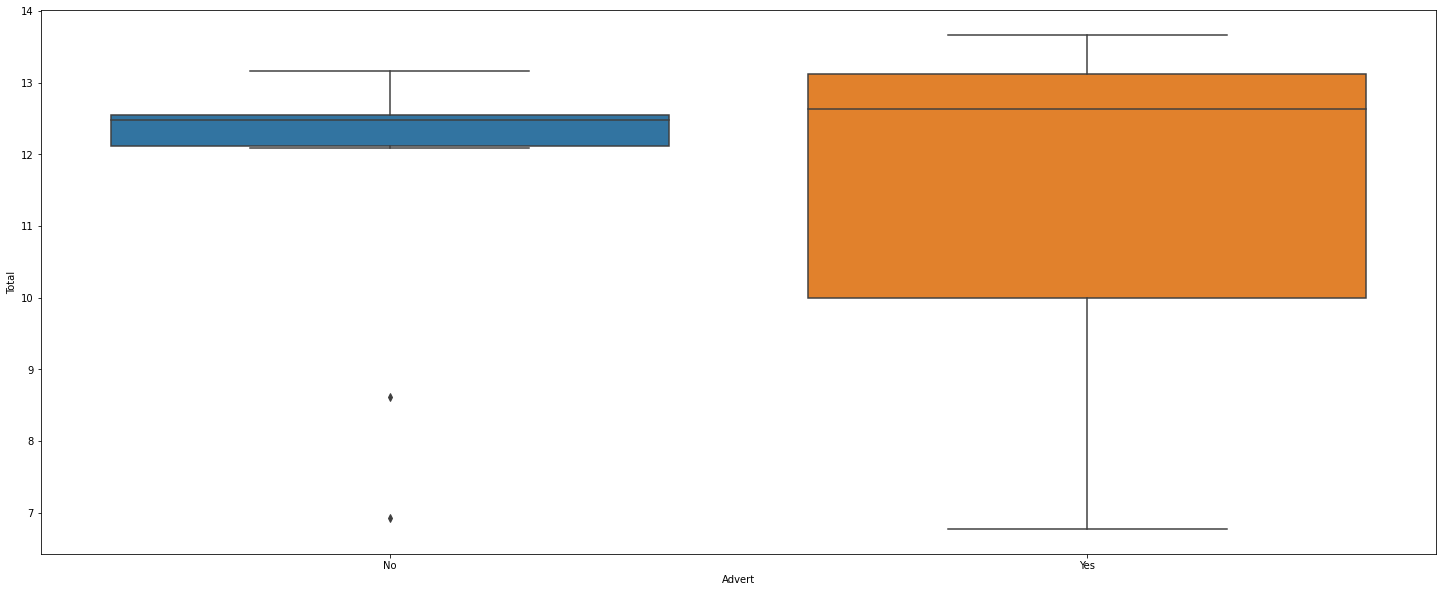

In [33]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Advert", y = "Total", data = df_sumdata_monthly_Yes_No);

## AB Testing

### Normallik Varsayımı

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır.

In [34]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Total)

ShapiroResult(statistic=0.8754656910896301, pvalue=0.09108942747116089)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.

In [35]:
shapiro(Grup_No.Total)

ShapiroResult(statistic=0.6542490720748901, pvalue=0.00012194395094411448)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır.

### Varyans Homojenliği Varsayımı

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen değildir.

In [36]:
stats.levene(Grup_Yes.Total, Grup_No.Total)

LeveneResult(statistic=1.2701778092743972, pvalue=0.27307411733182013)

* Ho reddedilmez. Varyanslar Homojendir.

* Normallik testleri sonucunda Reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır. Ancak Reklam verilen dönemin aylık satış ortalamalarının dağılımı normal dağılmadığı görülmektedir. 
* İki döneminde varyasnları homojendir.
* Tüm varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

### Hipotez Testi

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark yoktur.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark vardır.

#### Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [37]:
stats.ttest_ind(Grup_Yes.Total, Grup_No.Total, equal_var = True)

Ttest_indResult(statistic=-0.4874072311379591, pvalue=0.6312694803587022)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

#### Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [38]:
stats.mannwhitneyu(Grup_Yes.Total, Grup_No.Total)

MannwhitneyuResult(statistic=64.0, pvalue=0.8438314252467704)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

# 2- A/B TESTING OF WOCOMMERCE (ADVERT PERIOD AND BEFORE ADVERT PERIOD)

## Preprocessing Data

In [39]:
df_wocommerce.head()

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year
0,0,Abgeschlossen,2017-07-21 14:34:00,Essen,45143,DE,PayPal,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,1,HONIG,BAL CESITLERI,0,PERGAMO,11.68,5,7
1,1,Abgeschlossen,2017-09-05 12:05:31,Köln,50668,DE,PayPal,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,1,ZEYTINYAGI,ZEYTINYAGI,0,PERGAMO,20.56,2,9
2,2,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG LAVANDEL 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
3,3,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ORANGENBLUTEN 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
4,4,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ZITRONE 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.97,7,9


In [40]:
df_wocommerce["Order Date"] = df_wocommerce["Order Date"].astype("datetime64[ns]")

In [41]:
df_wocommerce.head()

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year
0,0,Abgeschlossen,2017-07-21 14:34:00,Essen,45143,DE,PayPal,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,1,HONIG,BAL CESITLERI,0,PERGAMO,11.68,5,7
1,1,Abgeschlossen,2017-09-05 12:05:31,Köln,50668,DE,PayPal,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,1,ZEYTINYAGI,ZEYTINYAGI,0,PERGAMO,20.56,2,9
2,2,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG LAVANDEL 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
3,3,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ORANGENBLUTEN 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
4,4,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ZITRONE 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.97,7,9


In [42]:
df_advert = pd.read_excel("advert.xlsx")
df_advert

,Period,Advert_Expence
0,2021-06-01,2474
1,2021-07-01,2619
2,2021-08-01,3059
3,2021-09-01,4007
4,2021-10-01,5596
5,2021-11-01,11387
6,2021-12-01,14935
7,2022-01-01,11847
8,2022-02-01,15920
9,2022-03-01,18038


* Reklam verilen dönem, 2021 Haziran ayı ile 2022 Nisan ayı dönemini kapsamaktadır.

In [43]:
df_wocommerce[(df_wocommerce["Order Date"] >= "2021-06-01") & (df_wocommerce["Order Date"] <= "2022-04-30")].sort_values(by = "Order Date")

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year
2258,2697,Abgeschlossen,2021-06-02 17:37:52,Essen,45276,DE,PayPal,FERSAN GRANATAPFELSIRUP 100 % GRANATAPFEL - NA...,1,SIRUP,MUTFAK ICIN YEMEKLIK URUNLER,0,PERGAMO,19.62,3,6
2259,2698,Abgeschlossen,2021-06-02 21:40:00,Potsdam,14482,DE,Überweisung,SAFAK NOMADENKÄSE NACH TURKISCHER ART /TULUM P...,1,PEYNIR CESITLERI,PEYNIR CESITLERI,0,PERGAMO,3.73,3,6
2260,2699,Abgeschlossen,2021-06-02 21:40:00,Potsdam,14482,DE,Überweisung,2 X 100G OZ-KAYSERI-PASTIRMA / RINDERSCHINKEN ...,1,SUCUK VE ET URUNLERI,SUCUK VE ET URUNLERI,0,PERGAMO,8.40,3,6
2261,2700,Abgeschlossen,2021-06-02 21:40:00,Potsdam,14482,DE,Überweisung,CAYKUR TIREBOLU 42 SCHWARZTEE 500G,2,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,0,PERGAMO,10.28,3,6
2262,2701,Abgeschlossen,2021-06-02 21:40:00,Potsdam,14482,DE,Überweisung,KURBISKERNE WEISS / BEYAZ KABAK CEKIRDEGI - GE...,1,DIGER CEREZ,CEREZLER,0,PERGAMO,5.60,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,11179,Completed,2022-04-29 22:52:47,Schwalmstadt,34613,DE,Banka havalesi/EFT,KATKISIZ ISPIR SEKER FASULYE 1 KG,1,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,0,MEMLEKET PAZARI,5.04,5,4
9770,11184,Completed,2022-04-29 22:52:47,Schwalmstadt,34613,DE,Banka havalesi/EFT,EV YAPIMI DOGAL ALIC SIRKESI 500ML ZEYTIN ANA,1,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,0,MEMLEKET PAZARI,3.36,5,4
9779,11195,Completed,2022-04-29 22:59:02,Villiers-le-bel,95400,FR,Kredi Kartı (Stripe),BEYAZ LEBLEBI - 1000 GR.,1,DIGER CEREZ,CEREZLER,0,MEMLEKET PAZARI,8.40,5,4
9778,11194,Completed,2022-04-29 22:59:02,Villiers-le-bel,95400,FR,Kredi Kartı (Stripe),ANTEP KATMER 3’LU PAKET 125 GRX3,3,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,0,MEMLEKET PAZARI,23.82,5,4


In [44]:
df_wocommerce["Advert"] = 0

In [45]:
df_wocommerce.head()

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year,Advert
0,0,Abgeschlossen,2017-07-21 14:34:00,Essen,45143,DE,PayPal,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,1,HONIG,BAL CESITLERI,0,PERGAMO,11.68,5,7,0
1,1,Abgeschlossen,2017-09-05 12:05:31,Köln,50668,DE,PayPal,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,1,ZEYTINYAGI,ZEYTINYAGI,0,PERGAMO,20.56,2,9,0
2,2,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG LAVANDEL 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9,0
3,3,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ORANGENBLUTEN 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9,0
4,4,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ZITRONE 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.97,7,9,0


In [46]:
for i, j in df_wocommerce["Order Date"].iteritems():
    if ((j >=pd.to_datetime("2021-06-01")) & (j <= pd.to_datetime("2022-04-30"))):
        df_wocommerce["Advert"][i] = 1       

In [47]:
df_wocommerce["Advert"].value_counts()

1    7523
0    5940
Name: Advert, dtype: int64

In [48]:
df_wocommerce[(df_wocommerce["Order Date"] >= "2021-05-30") & (df_wocommerce["Order Date"] <= "2022-04-30")].sort_values(by="Order Date")[150:]

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year,Advert
2393,2861,Abgeschlossen,2021-06-21 22:44:46,Düsseldorf,40599,DE,Überweisung,LEZZA 2X KUNEFE/KUNAFEH 290G,1,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,0,PERGAMO,5.60,1,6,1
2394,2862,Abgeschlossen,2021-06-21 22:44:46,Düsseldorf,40599,DE,Überweisung,LEZZA SU BOREGI PEYNIRLI/ WASSER BOREK MIT KÄS...,1,PEYNIR CESITLERI,PEYNIR CESITLERI,0,PERGAMO,3.73,1,6,1
2395,2863,Abgeschlossen,2021-06-21 22:44:46,Düsseldorf,40599,DE,Überweisung,STUR NUT SUSSE PISTAZIEN CREME / ANTEP FISTIK ...,1,RECEL KREMA EZME,RECEL KREMA EZME,0,PERGAMO,5.14,1,6,1
2396,2864,Abgeschlossen,2021-06-21 22:44:46,Düsseldorf,40599,DE,Überweisung,EGETURK-EGETAT DILIM SUCUK-KNOBLAUCHWURST IN S...,1,SUCUK VE ET URUNLERI,SUCUK VE ET URUNLERI,0,PERGAMO,8.40,1,6,1
2397,2865,Abgeschlossen,2021-06-21 22:44:46,Düsseldorf,40599,DE,Überweisung,GURSOY HONUTY HASELNUSSCREME(%70) MIT HONIG(20...,1,HASELNUSSCREME,RECEL KREMA EZME,0,PERGAMO,3.74,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9765,11179,Completed,2022-04-29 22:52:47,Schwalmstadt,34613,DE,Banka havalesi/EFT,KATKISIZ ISPIR SEKER FASULYE 1 KG,1,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,0,MEMLEKET PAZARI,5.04,5,4,1
9770,11184,Completed,2022-04-29 22:52:47,Schwalmstadt,34613,DE,Banka havalesi/EFT,EV YAPIMI DOGAL ALIC SIRKESI 500ML ZEYTIN ANA,1,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,0,MEMLEKET PAZARI,3.36,5,4,1
9779,11195,Completed,2022-04-29 22:59:02,Villiers-le-bel,95400,FR,Kredi Kartı (Stripe),BEYAZ LEBLEBI - 1000 GR.,1,DIGER CEREZ,CEREZLER,0,MEMLEKET PAZARI,8.40,5,4,1
9778,11194,Completed,2022-04-29 22:59:02,Villiers-le-bel,95400,FR,Kredi Kartı (Stripe),ANTEP KATMER 3’LU PAKET 125 GRX3,3,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,0,MEMLEKET PAZARI,23.82,5,4,1


In [49]:
df_wocommerce.set_index("Order Date", inplace =True)

In [50]:
df_wocommerce_monthly = df_wocommerce.resample("M").mean()

In [51]:
df_wocommerce_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     59 non-null     float64
 1   Quantity       59 non-null     float64
 2   Coupon Code    59 non-null     float64
 3   Sales          59 non-null     float64
 4   Day_of_Week    59 non-null     float64
 5   Month_of_Year  59 non-null     float64
 6   Advert         59 non-null     float64
dtypes: float64(7)
memory usage: 3.8 KB


In [52]:
df_wocommerce_monthly

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Advert
Order Date,,,,,,,
2017-07-31,0.00,1.00,0.00,11.68,5.00,7.00,0.00
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,6.50,1.00,0.00,12.07,3.92,9.00,0.00
2017-10-31,17.00,2.00,0.00,11.04,6.00,10.00,0.00
2017-11-30,23.67,1.33,0.00,8.84,3.00,11.00,0.00
...,...,...,...,...,...,...,...
2022-03-31,7658.78,1.20,0.07,8.48,4.08,3.00,1.00
2022-04-30,9884.98,1.16,0.08,8.15,4.38,4.00,0.97
2022-05-31,12400.65,1.17,0.10,8.06,4.04,5.00,0.00


In [53]:
df_wocommerce_monthly.Advert.value_counts(dropna = False)

0.00    48
1.00    10
NaN      2
0.97     1
Name: Advert, dtype: int64

In [54]:
df_wocommerce_monthly.dropna(how = "all", inplace = True)

In [55]:
for i,j in df_wocommerce_monthly.Advert.iteritems():
    print(i,j)

2017-07-31 00:00:00 0.0
2017-09-30 00:00:00 0.0
2017-10-31 00:00:00 0.0
2017-11-30 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-31 00:00:00 0.0
2018-02-28 00:00:00 0.0
2018-03-31 00:00:00 0.0
2018-04-30 00:00:00 0.0
2018-05-31 00:00:00 0.0
2018-06-30 00:00:00 0.0
2018-08-31 00:00:00 0.0
2018-09-30 00:00:00 0.0
2018-10-31 00:00:00 0.0
2018-11-30 00:00:00 0.0
2018-12-31 00:00:00 0.0
2019-01-31 00:00:00 0.0
2019-02-28 00:00:00 0.0
2019-03-31 00:00:00 0.0
2019-04-30 00:00:00 0.0
2019-05-31 00:00:00 0.0
2019-06-30 00:00:00 0.0
2019-07-31 00:00:00 0.0
2019-08-31 00:00:00 0.0
2019-09-30 00:00:00 0.0
2019-10-31 00:00:00 0.0
2019-11-30 00:00:00 0.0
2019-12-31 00:00:00 0.0
2020-01-31 00:00:00 0.0
2020-02-29 00:00:00 0.0
2020-03-31 00:00:00 0.0
2020-04-30 00:00:00 0.0
2020-05-31 00:00:00 0.0
2020-06-30 00:00:00 0.0
2020-07-31 00:00:00 0.0
2020-08-31 00:00:00 0.0
2020-09-30 00:00:00 0.0
2020-10-31 00:00:00 0.0
2020-11-30 00:00:00 0.0
2020-12-31 00:00:00 0.0
2021-01-31 00:00:00 0.0
2021-02-28 00:00

In [56]:
# "2022-04-30"
df_wocommerce_monthly.Advert.loc["2022-04-30"] = 1

In [57]:
df_wocommerce_monthly.Advert.value_counts(dropna = False)

0.00    48
1.00    11
Name: Advert, dtype: int64

In [58]:
df_wocommerce_monthly["Advert"] = df_wocommerce_monthly.Advert.map({0 : 'No', 1 : 'Yes'})

In [59]:
df_wocommerce_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-07-31 to 2022-07-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     59 non-null     float64
 1   Quantity       59 non-null     float64
 2   Coupon Code    59 non-null     float64
 3   Sales          59 non-null     float64
 4   Day_of_Week    59 non-null     float64
 5   Month_of_Year  59 non-null     float64
 6   Advert         59 non-null     object 
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


In [60]:
df_wocommerce_monthly.Advert.value_counts()

No     48
Yes    11
Name: Advert, dtype: int64

In [61]:
df_wocommerce_monthly

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Advert
Order Date,,,,,,,
2017-07-31,0.00,1.00,0.00,11.68,5.00,7.00,No
2017-09-30,6.50,1.00,0.00,12.07,3.92,9.00,No
2017-10-31,17.00,2.00,0.00,11.04,6.00,10.00,No
2017-11-30,23.67,1.33,0.00,8.84,3.00,11.00,No
2017-12-31,34.75,1.25,0.00,11.37,2.92,12.00,No
2018-01-31,48.00,1.50,0.00,10.85,3.50,1.00,No
2018-02-28,58.18,1.55,0.00,8.91,2.64,2.00,No
2018-03-31,80.08,1.15,0.00,8.94,4.85,3.00,No
2018-04-30,99.50,1.00,0.00,5.77,1.00,4.00,No


In [62]:
df_wocommerce_monthly.reset_index(inplace = True)

In [63]:
df_wocommerce_monthly["Yes"] = 0
df_wocommerce_monthly["No"] = 0

In [64]:
for i, j in df_wocommerce_monthly["Advert"].iteritems():
    if j == "Yes":
        df_wocommerce_monthly["Yes"].iloc[i] = df_wocommerce_monthly["Sales"].iloc[i]
    else:
        df_wocommerce_monthly["No"].iloc[i] = df_wocommerce_monthly["Sales"].iloc[i]

In [65]:
df_wocommerce_monthly

,Order Date,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Advert,Yes,No
0,2017-07-31,0.00,1.00,0.00,11.68,5.00,7.00,No,0.00,11.68
1,2017-09-30,6.50,1.00,0.00,12.07,3.92,9.00,No,0.00,12.07
2,2017-10-31,17.00,2.00,0.00,11.04,6.00,10.00,No,0.00,11.04
3,2017-11-30,23.67,1.33,0.00,8.84,3.00,11.00,No,0.00,8.84
4,2017-12-31,34.75,1.25,0.00,11.37,2.92,12.00,No,0.00,11.37
5,2018-01-31,48.00,1.50,0.00,10.85,3.50,1.00,No,0.00,10.85
6,2018-02-28,58.18,1.55,0.00,8.91,2.64,2.00,No,0.00,8.91
7,2018-03-31,80.08,1.15,0.00,8.94,4.85,3.00,No,0.00,8.94
8,2018-04-30,99.50,1.00,0.00,5.77,1.00,4.00,No,0.00,5.77
9,2018-05-31,107.50,1.50,0.00,13.95,2.75,5.00,No,0.00,13.95


In [66]:
Grup_Yes = df_wocommerce_monthly[df_wocommerce_monthly["Yes"] != 0][["Sales","Yes"]]
Grup_Yes

,Sales,Yes
45,8.67,8.67
46,9.18,9.18
47,9.60,9.60
48,9.86,9.86
49,8.30,8.30
50,8.77,8.77
51,8.73,8.73
52,8.66,8.66
53,7.93,7.93
54,8.48,8.48


In [67]:
len(Grup_Yes)

11

In [68]:
Grup_No = df_wocommerce_monthly[df_wocommerce_monthly["No"] != 0][["Sales","No"]]
Grup_No

,Sales,No
0,11.68,11.68
1,12.07,12.07
2,11.04,11.04
3,8.84,8.84
4,11.37,11.37
5,10.85,10.85
6,8.91,8.91
7,8.94,8.94
8,5.77,5.77
9,13.95,13.95


In [69]:
Grup_No.iloc[33:44]

,Sales,No
33,10.45,10.45
34,9.49,9.49
35,7.19,7.19
36,14.11,14.11
37,12.20,12.20
38,11.26,11.26
39,9.25,9.25
40,9.02,9.02
41,10.04,10.04
42,8.77,8.77


In [70]:
Grup_No = Grup_No.iloc[33:44]
Grup_No

,Sales,No
33,10.45,10.45
34,9.49,9.49
35,7.19,7.19
36,14.11,14.11
37,12.20,12.20
38,11.26,11.26
39,9.25,9.25
40,9.02,9.02
41,10.04,10.04
42,8.77,8.77


In [71]:
len(Grup_No)

11

In [72]:
df_wocommerce_monthly[33:44]

,Order Date,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Advert,Yes,No
33,2020-06-30,593.25,1.29,0.00,10.45,3.40,6.00,No,0.00,10.45
34,2020-07-31,661.67,1.08,0.03,9.49,3.14,7.00,No,0.00,9.49
35,2020-08-31,698.15,1.15,0.00,7.19,4.70,8.00,No,0.00,7.19
36,2020-09-30,721.33,1.44,0.00,14.11,2.78,9.00,No,0.00,14.11
37,2020-10-31,746.19,1.41,0.00,12.20,5.22,10.00,No,0.00,12.20
38,2020-11-30,800.63,1.33,0.00,11.26,3.45,11.00,No,0.00,11.26
39,2020-12-31,943.97,1.14,0.00,9.25,4.30,12.00,No,0.00,9.25
40,2021-01-31,1131.66,1.24,0.00,9.02,4.73,1.00,No,0.00,9.02
41,2021-02-28,1319.48,1.25,0.00,10.04,4.82,2.00,No,0.00,10.04
42,2021-03-31,1596.53,1.18,0.00,8.77,4.26,3.00,No,0.00,8.77


In [73]:
df_wocommerce_monthly_Yes_No = pd.concat([df_wocommerce_monthly[33:44], df_wocommerce_monthly[45:55]], axis=0)

In [74]:
df_wocommerce_monthly_Yes_No

,Order Date,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Advert,Yes,No
33,2020-06-30,593.25,1.29,0.00,10.45,3.40,6.00,No,0.00,10.45
34,2020-07-31,661.67,1.08,0.03,9.49,3.14,7.00,No,0.00,9.49
35,2020-08-31,698.15,1.15,0.00,7.19,4.70,8.00,No,0.00,7.19
36,2020-09-30,721.33,1.44,0.00,14.11,2.78,9.00,No,0.00,14.11
37,2020-10-31,746.19,1.41,0.00,12.20,5.22,10.00,No,0.00,12.20
38,2020-11-30,800.63,1.33,0.00,11.26,3.45,11.00,No,0.00,11.26
39,2020-12-31,943.97,1.14,0.00,9.25,4.30,12.00,No,0.00,9.25
40,2021-01-31,1131.66,1.24,0.00,9.02,4.73,1.00,No,0.00,9.02
41,2021-02-28,1319.48,1.25,0.00,10.04,4.82,2.00,No,0.00,10.04
42,2021-03-31,1596.53,1.18,0.00,8.77,4.26,3.00,No,0.00,8.77


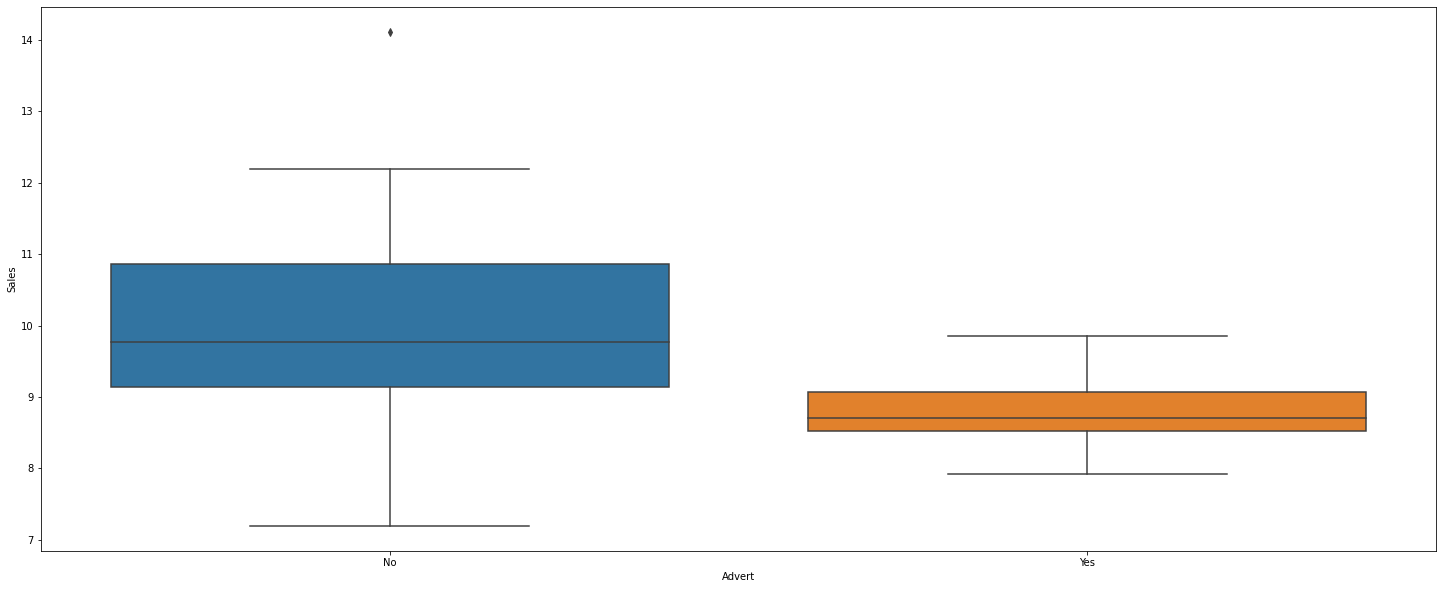

In [75]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Advert", y = "Sales", data = df_wocommerce_monthly_Yes_No);

## AB Testing

### Normallik Varsayımı

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır.

In [76]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Sales)

ShapiroResult(statistic=0.9434959888458252, pvalue=0.5624261498451233)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.

In [77]:
shapiro(Grup_No.Sales)

ShapiroResult(statistic=0.9499994516372681, pvalue=0.6439468264579773)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.

### Varyans Homojenliği Varsayımı

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen değildir.

In [78]:
stats.levene(Grup_Yes.Sales, Grup_No.Sales)

LeveneResult(statistic=4.539857280508607, pvalue=0.045714240049561636)

* Ho reddedilir. Varyanslar Homojen değildir. 

* Normallik testleri sonucunda reklam öncesi ve reklam verilen dönemlerin aylık ortalama satışları normal dağılmaktadır.  
* İki döneminde varyansları homojen değildir.
* Tüm varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

### Hipotez Testi

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark yoktur.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark vardır.

#### Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygulanacaktı.

In [79]:
stats.ttest_ind(Grup_Yes.Sales, Grup_No.Sales, equal_var = True)

Ttest_indResult(statistic=-2.356868875188202, pvalue=0.028735317932618857)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

#### Non parametrik Test

In [80]:
stats.mannwhitneyu(Grup_Yes.Sales, Grup_No.Sales)

MannwhitneyuResult(statistic=23.0, pvalue=0.015115269356493486)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

# 3- A/B TESTING OF SALEVALI (ADVERT PERIOD AND BEFORE ADVERT PERIOD)

## Preprocessing Data

In [81]:
df_salevali.sort_values(by = "Date")

,Unnamed: 0,Customer,Product Name,Sub_Category,Category,Amount,Sales,Marketplace,Payment Method,Date
8637,9614,KundenID18651,SAN NICASIO - KARTOFFELCHIPS MIT EXTRA NATIVES...,DIGER CEREZ,CEREZLER,1.00,18.68,Amazon,Amazon,2021-05-04
21280,23019,KundenID965,3 X SERA - JOHANNISBROTSIRUP 680G,PEKMEZ-TAHIN-TAHIN HELVASI,PEKMEZ-TAHIN-TAHIN HELVASI,1.00,18.62,Amazon,Amazon,2021-05-04
10361,11422,KundenID20278,TRAUBEN SIRUP - ZM PEKMEZI /GLSAN/VEGAN/ 100% ...,PEKMEZ-TAHIN-TAHIN HELVASI,PEKMEZ-TAHIN-TAHIN HELVASI,1.00,7.38,Amazon,Amazon,2021-05-05
10864,11937,KundenID20741,WABENHONIG IM HOLZRAHMEN*NATURBELASSEN*NACHHAL...,WABENHONIG,BAL CESITLERI,1.00,33.64,Amazon,Amazon,2021-05-05
8973,9964,KundenID18967,SESAMRINGE/SIMIT/TRKISCHE BAGEL-MEDITERRANE SP...,GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI,GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI,1.00,8.88,Amazon,Amazon,2021-05-05
...,...,...,...,...,...,...,...,...,...,...
2865,3357,KundenID13019,NEUE ERNTE 5 KG WEIZENMEHL - (1KG 5 ER PACK)/ ...,GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI,GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI,1.00,9.34,Amazon,Amazon,2022-04-29
397,464,KundenID10415,KARISIK LOKUM VE TATLI PAKETI,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,1.00,33.64,Wocommerce,Kredi Karti (Stripe),2022-04-29
398,465,KundenID10416,KARISIK CEREZ PAKETI,DIGER CEREZ,CEREZLER,1.00,33.64,Wocommerce,PayPal,2022-04-29
14547,15982,KundenID3315,DOGAL FINDIKLI MUSKA PESTIL,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,1.00,4.20,Wocommerce,SOFORT,2022-04-29


In [82]:
df_advert = pd.read_excel("advert.xlsx")
df_advert

,Period,Advert_Expence
0,2021-06-01,2474
1,2021-07-01,2619
2,2021-08-01,3059
3,2021-09-01,4007
4,2021-10-01,5596
5,2021-11-01,11387
6,2021-12-01,14935
7,2022-01-01,11847
8,2022-02-01,15920
9,2022-03-01,18038


* Reklam verilen dönem, 2021 Haziran ayı ile 2022 Nisan ayı dönemini kapsamaktadır.

* Salevali dataseti 2021 Mayıs ile 2022 Nisan dönemini kapsamaktadır. Reklam öncesi dönem salevali datasetinde mevcut olmadığından(veri yetersizliği sebebiyle) reklam öncesi ve reklam verilen dönem incelemeleri yapılamamaktadır.

* Sumdata ve Wocommerce datasetleri incelendiğinde Sumdata datasetinde reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olmadığı, Wocommerce datasetinde ise reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olduğu tespit edilmiştir.
* Salevati datasetinde reklam öncesi veriler olmadığından (veri yetersizliği sebebiyle) reklam öncesi ve reklam verilen dönem incelemeleri yapılamamıştır.

# 4- A/B TESTING OF WHOLE DATA (ADVERT PERIOD AND BEFORE ADVERT PERIOD)

## Preprocessing Data

In [83]:
df_whole.head()

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total
0,2017-07-21 14:34:00,PERGAMO,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,BAL CESITLERI,HONIG,1.00,11.68
1,2017-09-05 12:05:31,PERGAMO,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,ZEYTINYAGI,ZEYTINYAGI,1.00,20.56
2,2017-09-10 12:53:04,PERGAMO,BIO HONIG LAVANDEL 450 GR,BAL CESITLERI,HONIG,1.00,8.40
3,2017-09-10 12:53:04,PERGAMO,BIO HONIG ORANGENBLUTEN 450 GR,BAL CESITLERI,HONIG,1.00,8.40
4,2017-09-10 12:53:04,PERGAMO,BIO HONIG ZITRONE 450 GR,BAL CESITLERI,HONIG,1.00,8.97


In [84]:
df_whole["Order Date"] = df_whole["Order Date"].astype("datetime64[ns]")

In [85]:
df_whole.head()

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total
0,2017-07-21 14:34:00,PERGAMO,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,BAL CESITLERI,HONIG,1.00,11.68
1,2017-09-05 12:05:31,PERGAMO,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,ZEYTINYAGI,ZEYTINYAGI,1.00,20.56
2,2017-09-10 12:53:04,PERGAMO,BIO HONIG LAVANDEL 450 GR,BAL CESITLERI,HONIG,1.00,8.40
3,2017-09-10 12:53:04,PERGAMO,BIO HONIG ORANGENBLUTEN 450 GR,BAL CESITLERI,HONIG,1.00,8.40
4,2017-09-10 12:53:04,PERGAMO,BIO HONIG ZITRONE 450 GR,BAL CESITLERI,HONIG,1.00,8.97


In [86]:
df_advert = pd.read_excel("advert.xlsx")
df_advert

,Period,Advert_Expence
0,2021-06-01,2474
1,2021-07-01,2619
2,2021-08-01,3059
3,2021-09-01,4007
4,2021-10-01,5596
5,2021-11-01,11387
6,2021-12-01,14935
7,2022-01-01,11847
8,2022-02-01,15920
9,2022-03-01,18038


* Reklam verilen dönem, 2021 Haziran ayı ile 2022 Nisan ayı dönemini kapsamaktadır.

In [87]:
df_whole[(df_whole["Order Date"] >= "2021-06-01") & (df_whole["Order Date"] <= "2022-04-30")].sort_values(by = "Order Date")

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total
45706,2021-06-01 00:00:00,Wocommerce,PISTEZIEN UMHLLTE SCHOKO PESTIL GEFLLT MIT HAS...,RECEL KREMA EZME,HASELNUSSCREME,1.00,7.79
34259,2021-06-01 00:00:00,AMAZON,TURKISH DELIGHT / LOKUM / PISTAZIEN & SCHOKOLA...,ATISTIRMALIK LOKUM VE PESTIL,LOKUM,1.00,27.56
56652,2021-06-01 00:00:00,Amazon,GRANATAPFELSIRUP 100 % GRANATAPFEL KONZENTRAT ...,MUTFAK ICIN YEMEKLIK URUNLER,SIRUP,1.00,12.99
60074,2021-06-01 00:00:00,Wocommerce,ISOT-PAPRIKAGEWRZ / ISOT(URFA BIBER) - 250 GR,MUTFAK ICIN YEMEKLIK URUNLER,MUTFAK ICIN YEMEKLIK URUNLER,1.00,2.80
37819,2021-06-01 00:00:00,Amazon,KSK - JOHANNISBROT SIRUP - KECIBOYNUZU PEKMEZI...,PEKMEZ-TAHIN-TAHIN HELVASI,PEKMEZ-TAHIN-TAHIN HELVASI,1.00,6.95
...,...,...,...,...,...,...,...
1800,2022-04-29 22:52:47,MEMLEKET PAZARI,EV YAPIMI DOGAL ALIC SIRKESI 500ML ZEYTIN ANA,MUTFAK ICIN YEMEKLIK URUNLER,SIRKE,1.00,3.36
12233,2022-04-29 22:52:47,MEMLEKET PAZARI,TURKIYEDEN OZEL KURU BAMYA 100G,SEBZE VE MEYVE KURUSU,SEBZE KURUSU,1.00,4.21
9778,2022-04-29 22:59:02,MEMLEKET PAZARI,ANTEP KATMER 3’LU PAKET 125 GRX3,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,3.00,23.82
9779,2022-04-29 22:59:02,MEMLEKET PAZARI,BEYAZ LEBLEBI - 1000 GR.,CEREZLER,DIGER CEREZ,1.00,8.40


In [88]:
df_whole["Advert"] = 0

In [89]:
df_whole.head()

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total,Advert
0,2017-07-21 14:34:00,PERGAMO,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,BAL CESITLERI,HONIG,1.00,11.68,0
1,2017-09-05 12:05:31,PERGAMO,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,ZEYTINYAGI,ZEYTINYAGI,1.00,20.56,0
2,2017-09-10 12:53:04,PERGAMO,BIO HONIG LAVANDEL 450 GR,BAL CESITLERI,HONIG,1.00,8.40,0
3,2017-09-10 12:53:04,PERGAMO,BIO HONIG ORANGENBLUTEN 450 GR,BAL CESITLERI,HONIG,1.00,8.40,0
4,2017-09-10 12:53:04,PERGAMO,BIO HONIG ZITRONE 450 GR,BAL CESITLERI,HONIG,1.00,8.97,0


In [90]:
for i, j in df_whole["Order Date"].iteritems():
    if ((j >=pd.to_datetime("2021-06-01")) & (j <= pd.to_datetime("2022-04-30"))):
        df_whole["Advert"][i] = 1       

In [91]:
df_whole["Advert"].value_counts()

1    40537
0    19578
Name: Advert, dtype: int64

In [92]:
df_whole[(df_whole["Order Date"] >= "2021-05-30") & (df_whole["Order Date"] <= "2022-04-30")].sort_values(by="Order Date")[150:]

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total,Advert
30151,2021-05-31 00:00:00,AMAZON,RINCON DE LA SUBBETICA ALAMODA AOVE DOP BIO LI...,ZEYTINYAGI,ZEYTINYAGI,1.00,18.68,0
44967,2021-05-31 00:00:00,Amazon,PISTAZIEN BAKLAVA/ DIREKT AUS GAZIANTEP /TRADI...,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,14.35,0
32373,2021-05-31 00:00:00,AMAZON,TITIZ PETEKLI BAL WABENHONIG 400GR,BAL CESITLERI,WABENHONIG,1.00,16.26,0
32375,2021-05-31 00:00:00,AMAZON,TITIZ PETEKLI BAL WABENHONIG 400GR,BAL CESITLERI,WABENHONIG,1.00,13.07,0
27495,2021-05-31 00:00:00,AMAZON,MIEL DE CASTAÑO BIO 450 GR.,BAL CESITLERI,HONIG,1.00,11.21,0
...,...,...,...,...,...,...,...,...
9776,2022-04-29 22:52:47,MEMLEKET PAZARI,ZEYTIN ANA SIYAH KATIRLI ZEYTINI IRI BOY - 100...,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1.00,6.72,1
9777,2022-04-29 22:52:47,MEMLEKET PAZARI,TAM TAHIN 500 G - SAYGIN,PEKMEZ-TAHIN-TAHIN HELVASI,PEKMEZ-TAHIN-TAHIN HELVASI,1.00,4.63,1
9778,2022-04-29 22:59:02,MEMLEKET PAZARI,ANTEP KATMER 3’LU PAKET 125 GRX3,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,3.00,23.82,1
9779,2022-04-29 22:59:02,MEMLEKET PAZARI,BEYAZ LEBLEBI - 1000 GR.,CEREZLER,DIGER CEREZ,1.00,8.40,1


In [93]:
df_whole.set_index("Order Date", inplace =True)

### Ay Bazlı İnceleme(Monthly)

In [94]:
df_whole_monthly = df_whole.resample("M").mean()

In [95]:
df_whole_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  61 non-null     float64
 1   Total     61 non-null     float64
 2   Advert    61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [96]:
df_whole_monthly

,Quantity,Total,Advert
Order Date,,,
2017-07-31,1.00,11.68,0.00
2017-08-31,2.00,8.20,0.00
2017-09-30,1.00,12.05,0.00
2017-10-31,2.25,15.41,0.00
2017-11-30,1.35,11.96,0.00
...,...,...,...
2022-03-31,1.24,16.45,1.00
2022-04-30,1.18,14.17,0.99
2022-05-31,1.17,8.06,0.00


In [97]:
df_whole_monthly.Advert.value_counts(dropna = False)

0.00    50
1.00    10
0.99     1
Name: Advert, dtype: int64

In [98]:
df_whole_monthly.dropna(how = "all", inplace = True)

In [99]:
for i,j in df_whole_monthly.Advert.iteritems():
    print(i,j)

2017-07-31 00:00:00 0.0
2017-08-31 00:00:00 0.0
2017-09-30 00:00:00 0.0
2017-10-31 00:00:00 0.0
2017-11-30 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-31 00:00:00 0.0
2018-02-28 00:00:00 0.0
2018-03-31 00:00:00 0.0
2018-04-30 00:00:00 0.0
2018-05-31 00:00:00 0.0
2018-06-30 00:00:00 0.0
2018-07-31 00:00:00 0.0
2018-08-31 00:00:00 0.0
2018-09-30 00:00:00 0.0
2018-10-31 00:00:00 0.0
2018-11-30 00:00:00 0.0
2018-12-31 00:00:00 0.0
2019-01-31 00:00:00 0.0
2019-02-28 00:00:00 0.0
2019-03-31 00:00:00 0.0
2019-04-30 00:00:00 0.0
2019-05-31 00:00:00 0.0
2019-06-30 00:00:00 0.0
2019-07-31 00:00:00 0.0
2019-08-31 00:00:00 0.0
2019-09-30 00:00:00 0.0
2019-10-31 00:00:00 0.0
2019-11-30 00:00:00 0.0
2019-12-31 00:00:00 0.0
2020-01-31 00:00:00 0.0
2020-02-29 00:00:00 0.0
2020-03-31 00:00:00 0.0
2020-04-30 00:00:00 0.0
2020-05-31 00:00:00 0.0
2020-06-30 00:00:00 0.0
2020-07-31 00:00:00 0.0
2020-08-31 00:00:00 0.0
2020-09-30 00:00:00 0.0
2020-10-31 00:00:00 0.0
2020-11-30 00:00:00 0.0
2020-12-31 00:00

In [100]:
# "2022-04-30"
df_whole_monthly.Advert.loc["2022-04-30"] = 1

In [101]:
df_whole_monthly.Advert.value_counts(dropna = False)

0.00    50
1.00    11
Name: Advert, dtype: int64

In [102]:
df_whole_monthly["Advert"] = df_whole_monthly.Advert.map({0 : 'No', 1 : 'Yes'})

In [103]:
df_whole_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  61 non-null     float64
 1   Total     61 non-null     float64
 2   Advert    61 non-null     object 
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [104]:
df_whole_monthly.Advert.value_counts()

No     50
Yes    11
Name: Advert, dtype: int64

In [105]:
df_whole_monthly

,Quantity,Total,Advert
Order Date,,,
2017-07-31,1.00,11.68,No
2017-08-31,2.00,8.20,No
2017-09-30,1.00,12.05,No
2017-10-31,2.25,15.41,No
2017-11-30,1.35,11.96,No
...,...,...,...
2022-03-31,1.24,16.45,Yes
2022-04-30,1.18,14.17,Yes
2022-05-31,1.17,8.06,No


In [106]:
df_whole_monthly.reset_index(inplace = True)

In [107]:
df_whole_monthly["Yes"] = 0
df_whole_monthly["No"] = 0

In [108]:
for i, j in df_whole_monthly["Advert"].iteritems():
    if j == "Yes":
        df_whole_monthly["Yes"].iloc[i] = df_whole_monthly["Total"].iloc[i]
    else:
        df_whole_monthly["No"].iloc[i] = df_whole_monthly["Total"].iloc[i]

In [109]:
df_whole_monthly

,Order Date,Quantity,Total,Advert,Yes,No
0,2017-07-31,1.00,11.68,No,0.00,11.68
1,2017-08-31,2.00,8.20,No,0.00,8.20
2,2017-09-30,1.00,12.05,No,0.00,12.05
3,2017-10-31,2.25,15.41,No,0.00,15.41
4,2017-11-30,1.35,11.96,No,0.00,11.96
...,...,...,...,...,...,...
56,2022-03-31,1.24,16.45,Yes,16.45,0.00
57,2022-04-30,1.18,14.17,Yes,14.17,0.00
58,2022-05-31,1.17,8.06,No,0.00,8.06
59,2022-06-30,1.19,8.44,No,0.00,8.44


In [110]:
Grup_Yes = df_whole_monthly[df_whole_monthly["Yes"] != 0][["Total","Yes"]]
Grup_Yes

,Total,Yes
47,14.00,14.00
48,14.07,14.07
49,14.55,14.55
50,14.99,14.99
51,15.78,15.78
52,17.34,17.34
53,19.02,19.02
54,18.08,18.08
55,14.96,14.96
56,16.45,16.45


In [111]:
len(Grup_Yes)

11

In [112]:
Grup_No = df_whole_monthly[df_whole_monthly["No"] != 0][["Total","No"]]
Grup_No

,Total,No
0,11.68,11.68
1,8.20,8.20
2,12.05,12.05
3,15.41,15.41
4,11.96,11.96
5,11.69,11.69
6,14.10,14.10
7,12.55,12.55
8,13.76,13.76
9,14.92,14.92


In [113]:
Grup_No.iloc[35:46]

,Total,No
35,9.44,9.44
36,8.85,8.85
37,12.35,12.35
38,13.20,13.20
39,12.83,12.83
40,12.25,12.25
41,11.58,11.58
42,12.12,12.12
43,11.39,11.39
44,11.55,11.55


In [114]:
Grup_No = Grup_No.iloc[35:46]
Grup_No

,Total,No
35,9.44,9.44
36,8.85,8.85
37,12.35,12.35
38,13.20,13.20
39,12.83,12.83
40,12.25,12.25
41,11.58,11.58
42,12.12,12.12
43,11.39,11.39
44,11.55,11.55


In [115]:
len(Grup_No)

11

In [116]:
df_whole_monthly[35:46]

,Order Date,Quantity,Total,Advert,Yes,No
35,2020-06-30,1.27,9.44,No,0.00,9.44
36,2020-07-31,1.21,8.85,No,0.00,8.85
37,2020-08-31,1.26,12.35,No,0.00,12.35
38,2020-09-30,1.31,13.20,No,0.00,13.20
39,2020-10-31,1.32,12.83,No,0.00,12.83
40,2020-11-30,1.27,12.25,No,0.00,12.25
41,2020-12-31,1.18,11.58,No,0.00,11.58
42,2021-01-31,1.15,12.12,No,0.00,12.12
43,2021-02-28,1.28,11.39,No,0.00,11.39
44,2021-03-31,1.18,11.55,No,0.00,11.55


In [117]:
df_whole_monthly_Yes_No = pd.concat([df_whole_monthly[35:46], df_whole_monthly[47:57]], axis=0)

In [118]:
df_whole_monthly_Yes_No

,Order Date,Quantity,Total,Advert,Yes,No
35,2020-06-30,1.27,9.44,No,0.00,9.44
36,2020-07-31,1.21,8.85,No,0.00,8.85
37,2020-08-31,1.26,12.35,No,0.00,12.35
38,2020-09-30,1.31,13.20,No,0.00,13.20
39,2020-10-31,1.32,12.83,No,0.00,12.83
40,2020-11-30,1.27,12.25,No,0.00,12.25
41,2020-12-31,1.18,11.58,No,0.00,11.58
42,2021-01-31,1.15,12.12,No,0.00,12.12
43,2021-02-28,1.28,11.39,No,0.00,11.39
44,2021-03-31,1.18,11.55,No,0.00,11.55


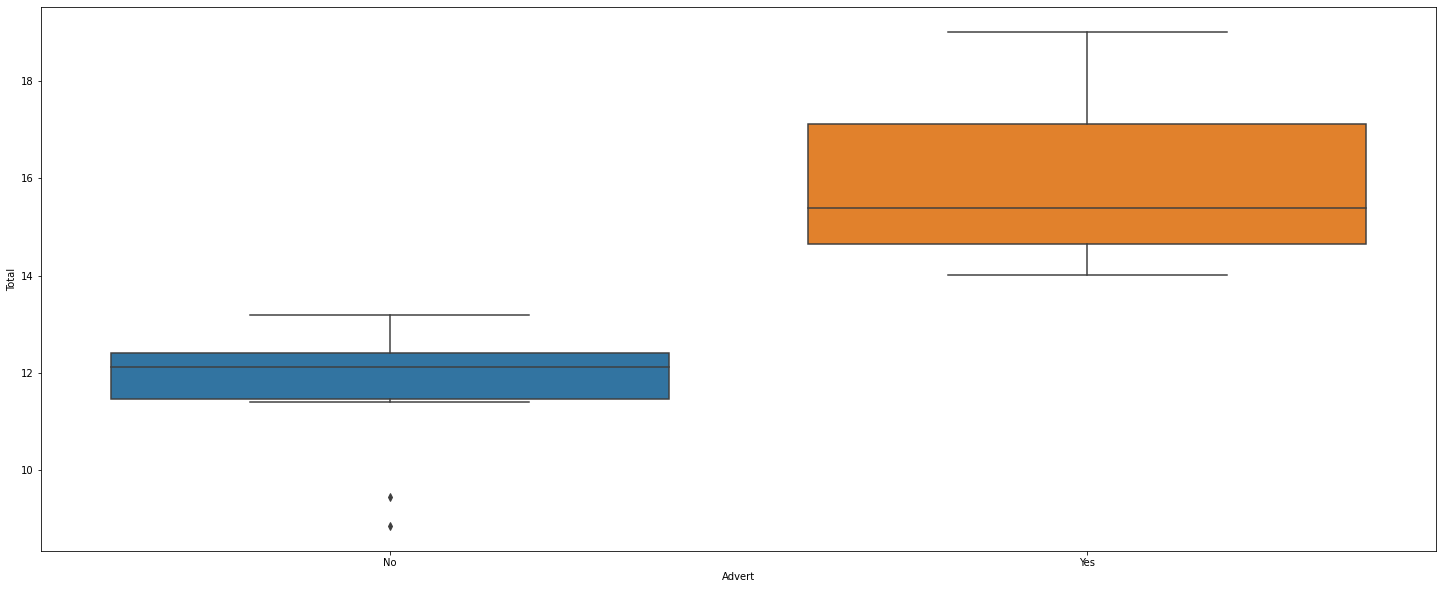

In [119]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Advert", y = "Total", data = df_whole_monthly_Yes_No);

## AB Testing

### Normallik Varsayımı

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır.

In [120]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Total)

ShapiroResult(statistic=0.8916825652122498, pvalue=0.145952969789505)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.

In [121]:
shapiro(Grup_No.Total)

ShapiroResult(statistic=0.8568044900894165, pvalue=0.052337244153022766)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.

### Varyans Homojenliği Varsayımı

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen değildir.

In [122]:
stats.levene(Grup_Yes.Total, Grup_No.Total)

LeveneResult(statistic=0.7086185018617246, pvalue=0.40985602290511425)

* Ho reddedilmez. Varyanslar Homojendir. 

* Normallik testleri sonucunda reklam öncesi ve reklam verilen dönemlerin aylık ortalama satışları normal dağılmaktadır.  
* İki döneminde varyansları homojendir.
* Tüm varsayımlarımız gerçekleştiğinden parametrik test olan T testi uygulanacaktır.

### Hipotez Testi

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark yoktur.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark vardır.

#### Parametrik Test

* Varsayımlarımız gerçekleştiğinden parametrik test olan T testi uygulayacağız.

In [123]:
stats.ttest_ind(Grup_Yes.Total, Grup_No.Total, equal_var = True)

Ttest_indResult(statistic=6.218060289115245, pvalue=4.501696938065238e-06)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

* Eğer varsayımlar gerçekleşmeseydi bağımsız Man Whitney testi uygulanacaktı.

#### Non parametrik Test

In [124]:
stats.mannwhitneyu(Grup_Yes.Total, Grup_No.Total)

MannwhitneyuResult(statistic=121.0, pvalue=8.151536127743244e-05)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

# SONUC

* Sumdata, Wocommerce ve Salevali datasetlerini birleştirerek oluşturuduğumuz tüm dataseti kullanılarak yaptığımız AB Testi sonucunda Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olduğunu bilimsel olarak tespit ettik. 
* Reklam harcamalarının aylık ortalama satışları arttırmasının tesadüfi olmadığı görülmüş olup reklam verilmesine devam edilmesi tavsiye edilmektedir.

### Hafta Bazlı İnceleme(Weekly)

In [125]:
df_whole_weekly = df_whole.resample("W").mean()

In [126]:
df_whole_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2017-07-23 to 2022-07-03
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  244 non-null    float64
 1   Total     244 non-null    float64
 2   Advert    244 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


In [127]:
df_whole_weekly

,Quantity,Total,Advert
Order Date,,,
2017-07-23,1.00,11.68,0.00
2017-07-30,NaN,NaN,NaN
2017-08-06,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN
2017-08-20,NaN,NaN,NaN
...,...,...,...
2022-06-05,1.14,7.62,0.00
2022-06-12,1.21,8.64,0.00
2022-06-19,1.22,8.51,0.00


In [128]:
df_whole_weekly.Advert.value_counts(dropna = False)

0.00    196
1.00     46
NaN      15
0.61      1
0.90      1
Name: Advert, dtype: int64

In [129]:
df_whole_weekly.dropna(how = "all", inplace = True)

In [130]:
for i,j in df_whole_weekly.Advert.iteritems():
    print(i,j)

2017-07-23 00:00:00 0.0
2017-09-03 00:00:00 0.0
2017-09-10 00:00:00 0.0
2017-09-17 00:00:00 0.0
2017-09-24 00:00:00 0.0
2017-10-08 00:00:00 0.0
2017-11-05 00:00:00 0.0
2017-11-12 00:00:00 0.0
2017-11-19 00:00:00 0.0
2017-11-26 00:00:00 0.0
2017-12-03 00:00:00 0.0
2017-12-10 00:00:00 0.0
2017-12-17 00:00:00 0.0
2017-12-24 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-07 00:00:00 0.0
2018-01-14 00:00:00 0.0
2018-01-21 00:00:00 0.0
2018-01-28 00:00:00 0.0
2018-02-04 00:00:00 0.0
2018-02-11 00:00:00 0.0
2018-02-18 00:00:00 0.0
2018-02-25 00:00:00 0.0
2018-03-04 00:00:00 0.0
2018-03-11 00:00:00 0.0
2018-03-18 00:00:00 0.0
2018-03-25 00:00:00 0.0
2018-04-01 00:00:00 0.0
2018-04-08 00:00:00 0.0
2018-04-15 00:00:00 0.0
2018-04-22 00:00:00 0.0
2018-04-29 00:00:00 0.0
2018-05-06 00:00:00 0.0
2018-05-13 00:00:00 0.0
2018-05-20 00:00:00 0.0
2018-05-27 00:00:00 0.0
2018-06-03 00:00:00 0.0
2018-06-10 00:00:00 0.0
2018-06-24 00:00:00 0.0
2018-07-08 00:00:00 0.0
2018-07-22 00:00:00 0.0
2018-07-29 00:00

In [131]:
# "2021-06-06"
# "2022-05-01"
df_whole_weekly.Advert.loc["2021-06-06"] = 1
df_whole_weekly.Advert.loc["2022-05-01"] = 1

In [132]:
df_whole_weekly.Advert.value_counts(dropna = False)

0.00    196
1.00     48
Name: Advert, dtype: int64

In [133]:
df_whole_weekly["Advert"] = df_whole_weekly.Advert.map({0 : 'No', 1 : 'Yes'})

In [134]:
df_whole_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2017-07-23 to 2022-07-03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  244 non-null    float64
 1   Total     244 non-null    float64
 2   Advert    244 non-null    object 
dtypes: float64(2), object(1)
memory usage: 15.7+ KB


In [135]:
df_whole_weekly.Advert.value_counts()

No     196
Yes     48
Name: Advert, dtype: int64

In [136]:
df_whole_weekly

,Quantity,Total,Advert
Order Date,,,
2017-07-23,1.00,11.68,No
2017-09-03,1.67,9.36,No
2017-09-10,1.00,13.38,No
2017-09-17,1.00,8.59,No
2017-09-24,1.00,12.31,No
...,...,...,...
2022-06-05,1.14,7.62,No
2022-06-12,1.21,8.64,No
2022-06-19,1.22,8.51,No


In [137]:
df_whole_weekly.reset_index(inplace = True)

In [138]:
df_whole_weekly["Yes"] = 0
df_whole_weekly["No"] = 0

In [139]:
for i, j in df_whole_weekly["Advert"].iteritems():
    if j == "Yes":
        df_whole_weekly["Yes"].iloc[i] = df_whole_weekly["Total"].iloc[i]
    else:
        df_whole_weekly["No"].iloc[i] = df_whole_weekly["Total"].iloc[i]

In [140]:
df_whole_weekly

,Order Date,Quantity,Total,Advert,Yes,No
0,2017-07-23,1.00,11.68,No,0.00,11.68
1,2017-09-03,1.67,9.36,No,0.00,9.36
2,2017-09-10,1.00,13.38,No,0.00,13.38
3,2017-09-17,1.00,8.59,No,0.00,8.59
4,2017-09-24,1.00,12.31,No,0.00,12.31
...,...,...,...,...,...,...
239,2022-06-05,1.14,7.62,No,0.00,7.62
240,2022-06-12,1.21,8.64,No,0.00,8.64
241,2022-06-19,1.22,8.51,No,0.00,8.51
242,2022-06-26,1.21,8.66,No,0.00,8.66


In [141]:
Grup_Yes = df_whole_weekly[df_whole_weekly["Yes"] != 0][["Total","Yes"]]
Grup_Yes

,Total,Yes
187,14.17,14.17
188,13.74,13.74
189,14.42,14.42
190,13.33,13.33
191,13.79,13.79
192,14.12,14.12
193,17.05,17.05
194,14.06,14.06
195,13.46,13.46
196,14.71,14.71


In [142]:
len(Grup_Yes)

48

In [143]:
Grup_No = df_whole_weekly[df_whole_weekly["No"] != 0][["Total","No"]]
Grup_No

,Total,No
0,11.68,11.68
1,9.36,9.36
2,13.38,13.38
3,8.59,8.59
4,12.31,12.31
...,...,...
239,7.62,7.62
240,8.64,8.64
241,8.51,8.51
242,8.66,8.66


In [144]:
Grup_No.iloc[135:183]

,Total,No
135,10.58,10.58
136,9.76,9.76
137,7.96,7.96
138,8.48,8.48
139,10.26,10.26
140,7.21,7.21
141,6.82,6.82
142,8.81,8.81
143,12.00,12.00
144,11.43,11.43


In [145]:
Grup_No = Grup_No.iloc[135:183]
Grup_No

,Total,No
135,10.58,10.58
136,9.76,9.76
137,7.96,7.96
138,8.48,8.48
139,10.26,10.26
140,7.21,7.21
141,6.82,6.82
142,8.81,8.81
143,12.00,12.00
144,11.43,11.43


In [146]:
len(Grup_No)

48

In [147]:
df_whole_weekly[135:183]

,Order Date,Quantity,Total,Advert,Yes,No
135,2020-06-07,1.35,10.58,No,0.00,10.58
136,2020-06-14,1.05,9.76,No,0.00,9.76
137,2020-06-21,1.62,7.96,No,0.00,7.96
138,2020-06-28,1.33,8.48,No,0.00,8.48
139,2020-07-05,1.25,10.26,No,0.00,10.26
140,2020-07-12,1.21,7.21,No,0.00,7.21
141,2020-07-19,1.16,6.82,No,0.00,6.82
142,2020-07-26,1.07,8.81,No,0.00,8.81
143,2020-08-02,1.39,12.00,No,0.00,12.00
144,2020-08-09,1.42,11.43,No,0.00,11.43


In [148]:
df_whole_weekly_Yes_No = pd.concat([df_whole_weekly[135:183], df_whole_weekly[187:235]], axis=0)

In [149]:
df_whole_weekly_Yes_No

,Order Date,Quantity,Total,Advert,Yes,No
135,2020-06-07,1.35,10.58,No,0.00,10.58
136,2020-06-14,1.05,9.76,No,0.00,9.76
137,2020-06-21,1.62,7.96,No,0.00,7.96
138,2020-06-28,1.33,8.48,No,0.00,8.48
139,2020-07-05,1.25,10.26,No,0.00,10.26
...,...,...,...,...,...,...
230,2022-04-03,1.17,16.56,Yes,16.56,0.00
231,2022-04-10,1.20,15.98,Yes,15.98,0.00
232,2022-04-17,1.19,14.53,Yes,14.53,0.00
233,2022-04-24,1.20,12.72,Yes,12.72,0.00


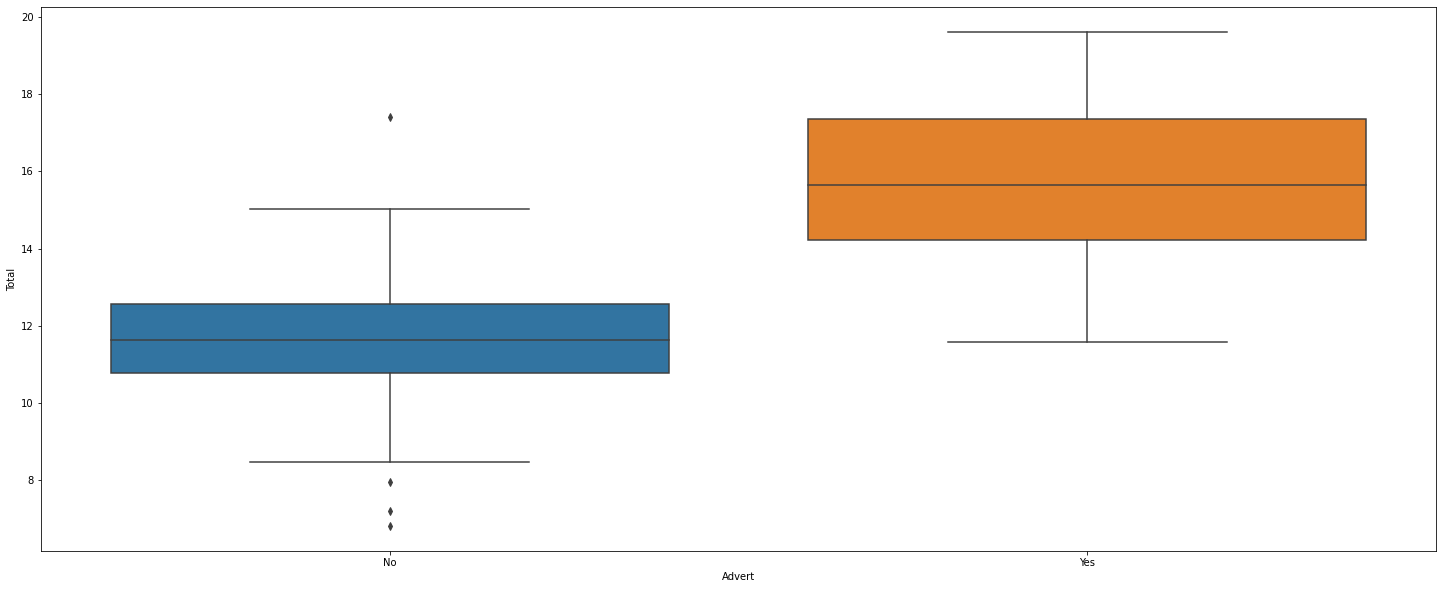

In [150]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Advert", y = "Total", data = df_whole_weekly_Yes_No);

## AB Testing

### Normallik Varsayımı

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmaktadır.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık ortalama satışları normal dağılmamaktadır.

In [151]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Total)

ShapiroResult(statistic=0.9582095742225647, pvalue=0.08545845746994019)

* Ho reddedilmez. Reklam verilen dönem ile reklam öncesi dönemin haftalık ortalama satışları normal dağılmaktadır.

In [152]:
shapiro(Grup_No.Total)

ShapiroResult(statistic=0.9357334971427917, pvalue=0.011160081252455711)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin haftalık ortalama satışları normal dağılmamaktadır.

### Varyans Homojenliği Varsayımı

H0: Varyanslar Homojendir.

H1: Varyanslar Homojen değildir.

In [153]:
stats.levene(Grup_Yes.Total, Grup_No.Total)

LeveneResult(statistic=3.8325976184547663, pvalue=0.05323059090865402)

* Ho reddedilmez. Varyanslar Homojendir. 

* Normallik testleri sonucunda reklam öncesi dönemin haftalık ortalama satışları normal dağılmamakta reklam verilen dönemlerin hatalık ortalama satışları ise normal dağılmaktadır.  
* İki döneminde varyansları homojendir.
* Tüm varsayımlarımız gerçekleşmediğinden non-parametrik test olan Mann Whitney testi uygulanacaktır.

### Hipotez Testi

* Ho: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark yoktur.
* H1: Reklam verilen dönem ile reklam öncesi dönemin aylık satış ortalamaları arasında fark vardır.

#### Parametrik Test

* Varsayımlarımız gerçekleşseydi parametrik test olan T testi uygulayacaktık.

In [154]:
stats.ttest_ind(Grup_Yes.Total, Grup_No.Total, equal_var = True)

Ttest_indResult(statistic=10.64854052370132, pvalue=7.753446199335769e-18)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

* Varsayımlarımız gerçekleşmediğinden  non-parametrik test olan Mann Whitney testi uygulayacağız.

#### Non parametrik Test

In [155]:
stats.mannwhitneyu(Grup_Yes.Total, Grup_No.Total)

MannwhitneyuResult(statistic=2199.0, pvalue=1.7420317953044304e-14)

* Ho reddedilir. Reklam verilen dönem ile reklam öncesi dönemin haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

# SONUC

* Sumdata, Wocommerce ve Salevali datasetlerini birleştirerek oluşturuduğumuz tüm dataseti kullanılarak yaptığımız AB Testi sonucunda Reklam verilen dönem ile reklam öncesi dönemin aylık ve haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olduğunu bilimsel olarak tespit ettik. 
* Reklam harcamalarının aylık ve haftalık ortalama satışları(ciroları) arttırmasının tesadüfi olmadığı görülmüş olup reklam verilmesine devam edilmesi tavsiye edilmektedir.
* Reklam verilen dönem 2021 Haziran - 2022 Nisan arası(11 aylık) dönemdir. 
* Mevsimselliğin etkisini arındırmak için reklam öncesi dönem 2020 Haziran - 2021 Nisan tarihleri arası(11 aylık dönem) dikkate alınmıştır.